In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("./dataset/Bishal_Abalone_Age.csv")

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.tail()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


#### renaming the columns name and replace space with _ for easier access of columns names


In [9]:
df.rename(
    columns ={
        col: col.replace(' ', "_") for col in df.columns
    }, inplace = True
)

##### lowering the column names

In [10]:
df.columns = [cols.lower() for cols in df.columns]

In [11]:
df.head(30)

,sex,length,diameter,height,whole_weightshucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [12]:
df.shape

(4177, 9)

In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sex                         4177 non-null   object 
 1   length                      4177 non-null   float64
 2   diameter                    4177 non-null   float64
 3   height                      4177 non-null   float64
 4   whole_weightshucked_weight  4177 non-null   float64
 5   viscera_weight              4177 non-null   float64
 6   shell_weight                4177 non-null   float64
 7   rings                       4177 non-null   float64
 8   age                         4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### checking possible null values

In [14]:
df.isna()

,sex,length,diameter,height,whole_weightshucked_weight,viscera_weight,shell_weight,rings,age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [15]:
## calculating the sum of total missing values for each feature
df.isna().sum()

sex                           0
length                        0
diameter                      0
height                        0
whole_weightshucked_weight    0
viscera_weight                0
shell_weight                  0
rings                         0
age                           0
dtype: int64

##### finding the unquie values in each columns

In [16]:
df.nunique()

sex                              3
length                         134
diameter                       111
height                          51
whole_weightshucked_weight    2429
viscera_weight                1515
shell_weight                   880
rings                          926
age                             28
dtype: int64

#### finding the statistical summary of each column

In [17]:
df.describe()

,length,diameter,height,whole_weightshucked_weight,viscera_weight,shell_weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


##### creating birth year column 

In [18]:
df["birth_year"] = date.today().year-df["age"]

In [19]:
df.head(20)

,sex,length,diameter,height,whole_weightshucked_weight,viscera_weight,shell_weight,rings,age,birth_year
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2009
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2017
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2015
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2014
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2017
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,2016
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,2004
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,2008
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,2015
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,2005


#### filtering only Male and Female data

In [20]:
filtered_by_sex = df[df["sex"].isin(["M","F"])]

In [21]:
filtered_by_sex

,sex,length,diameter,height,whole_weightshucked_weight,viscera_weight,shell_weight,rings,age,birth_year
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2009
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2017
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2015
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2014
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,2004
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2013
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2014
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2015
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2014


In [22]:
#### finding the correlation between two columns of data
correlation_df = df.drop("sex", axis=1)
correlation_matrix = correlation_df.corr()
correlation_matrix

,length,diameter,height,whole_weightshucked_weight,viscera_weight,shell_weight,rings,age,birth_year
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.557467
whole_weightshucked_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.540390
viscera_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.420884
shell_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.503819
rings,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.627574
age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-1.000000
birth_year,-0.556720,-0.574660,-0.557467,-0.540390,-0.420884,-0.503819,-0.627574,-1.000000,1.000000


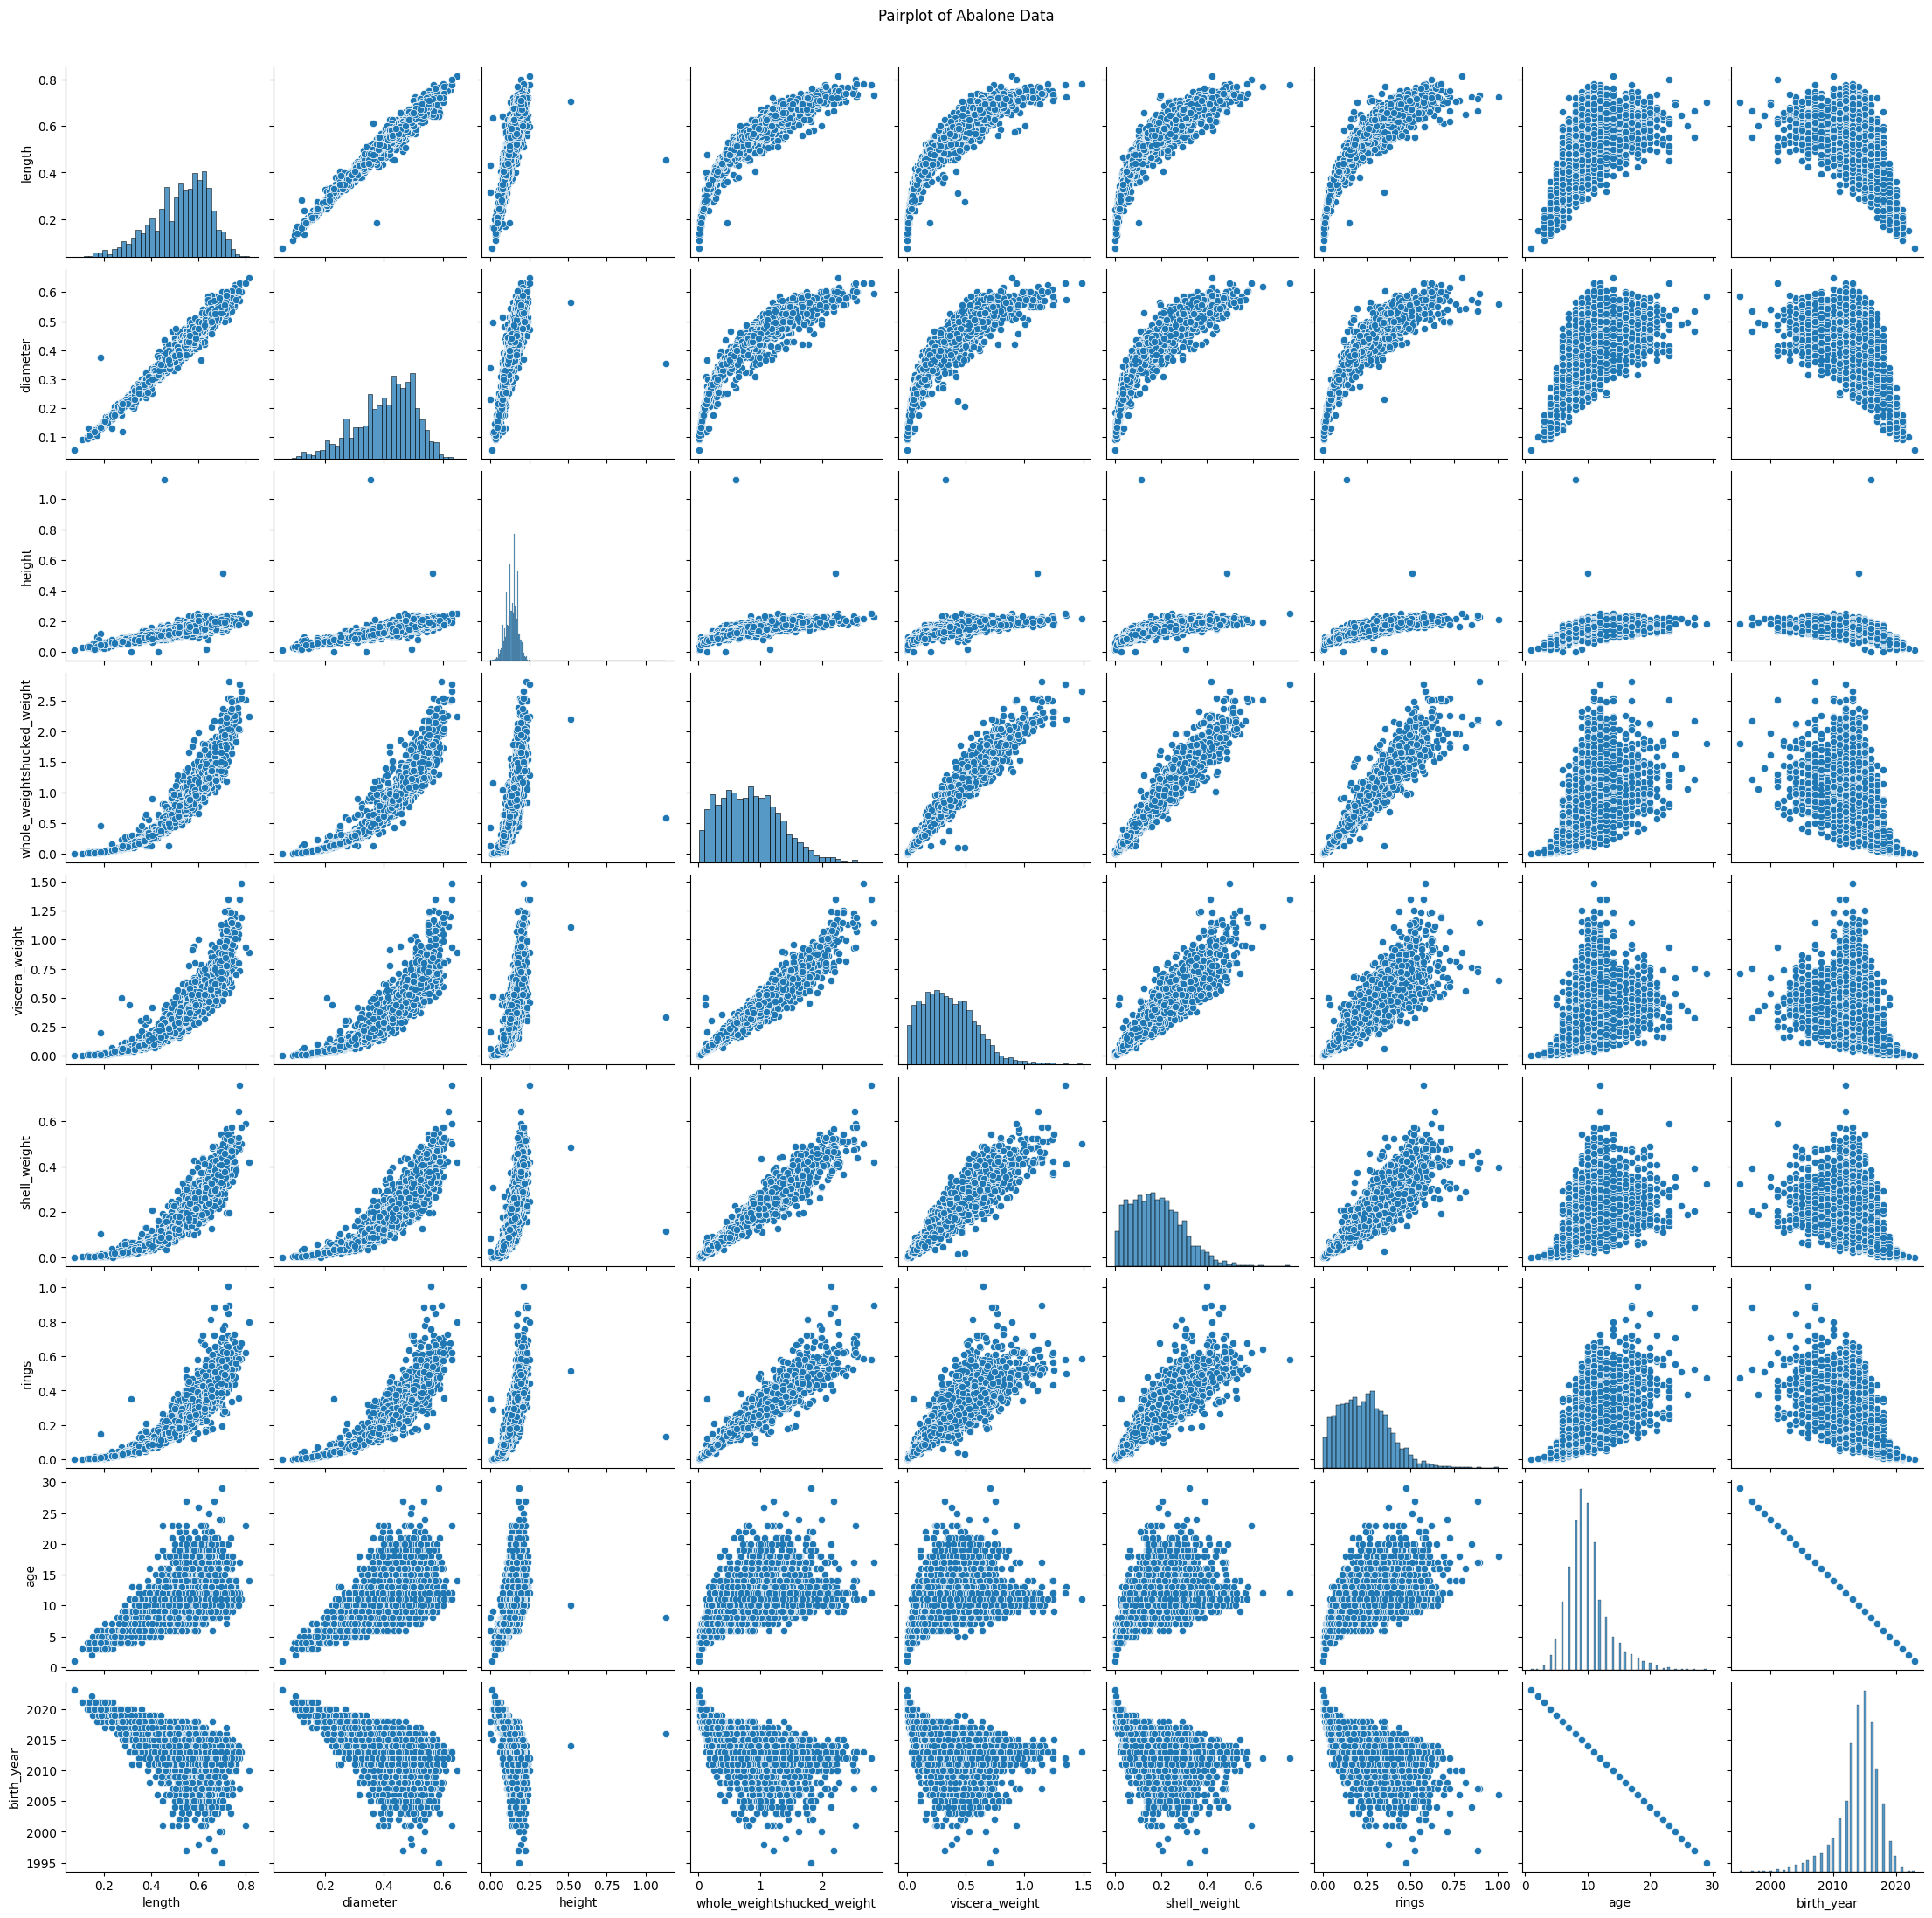

In [23]:
#### plotting a pair plot
sns.pairplot(data=df)
plt.suptitle("Pairplot of Abalone Data")
# Adjusting the title position
plt.subplots_adjust(top=0.95)

plt.show()

##### seperating categorical and numerical columns for easier visualization and understanding

In [24]:
## storing categrical variables
cat_cols = [col for col, dtype in df.dtypes.items() if dtype == "object"]
### storing numerical variables
num_cols =  [col for col in df.columns if df[col].dtype in ['int64', 'float64']]


In [25]:
cat_cols

['sex']

In [26]:
num_cols

['length',
 'diameter',
 'height',
 'whole_weightshucked_weight',
 'viscera_weight',
 'shell_weight',
 'rings',
 'age',
 'birth_year']

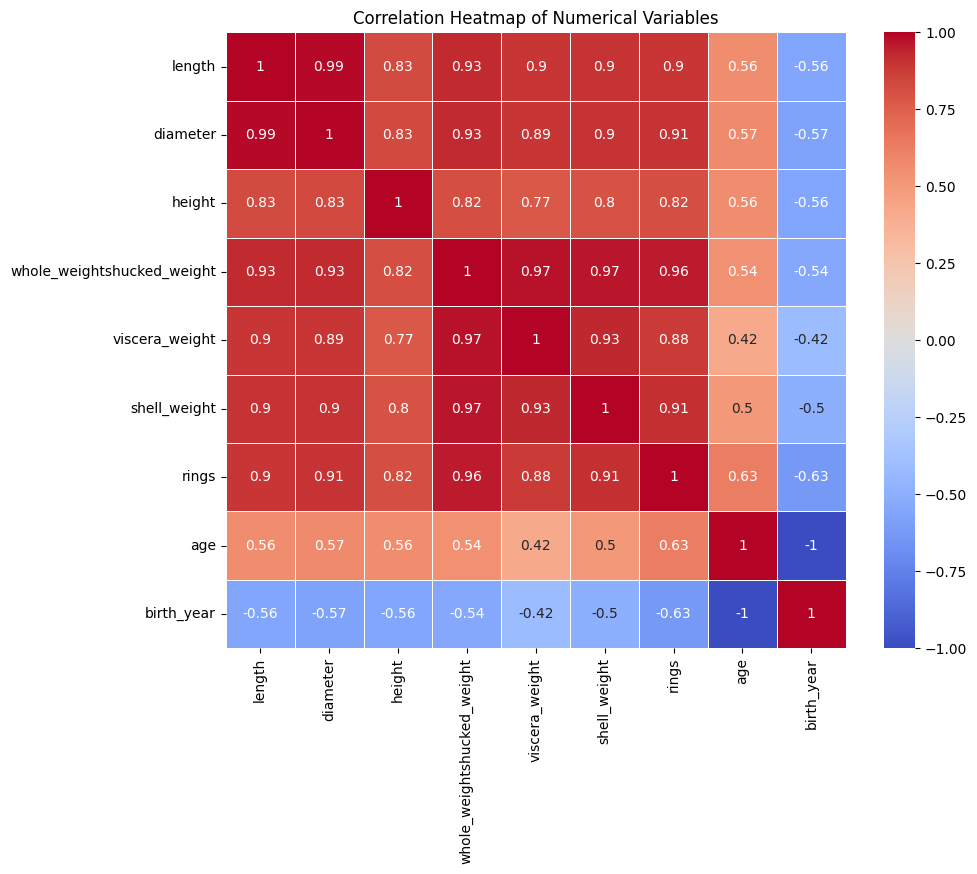

In [27]:

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

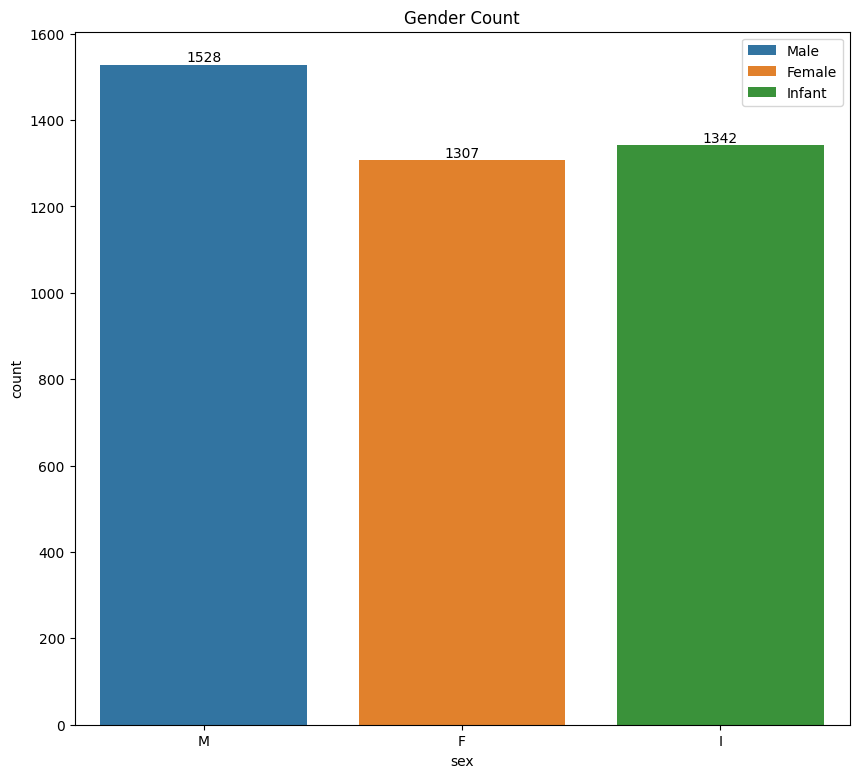

In [28]:
for cat_col in cat_cols:
    plt.figure(figsize=(10, 9))
    gender_bar = sns.countplot(data=df, x=cat_col, hue="sex")
    for container in gender_bar.containers:
        gender_bar.bar_label(container)
    plt.legend(labels=['Male', 'Female', "Infant"],loc = "upper right")    
    plt.title("Gender Count")

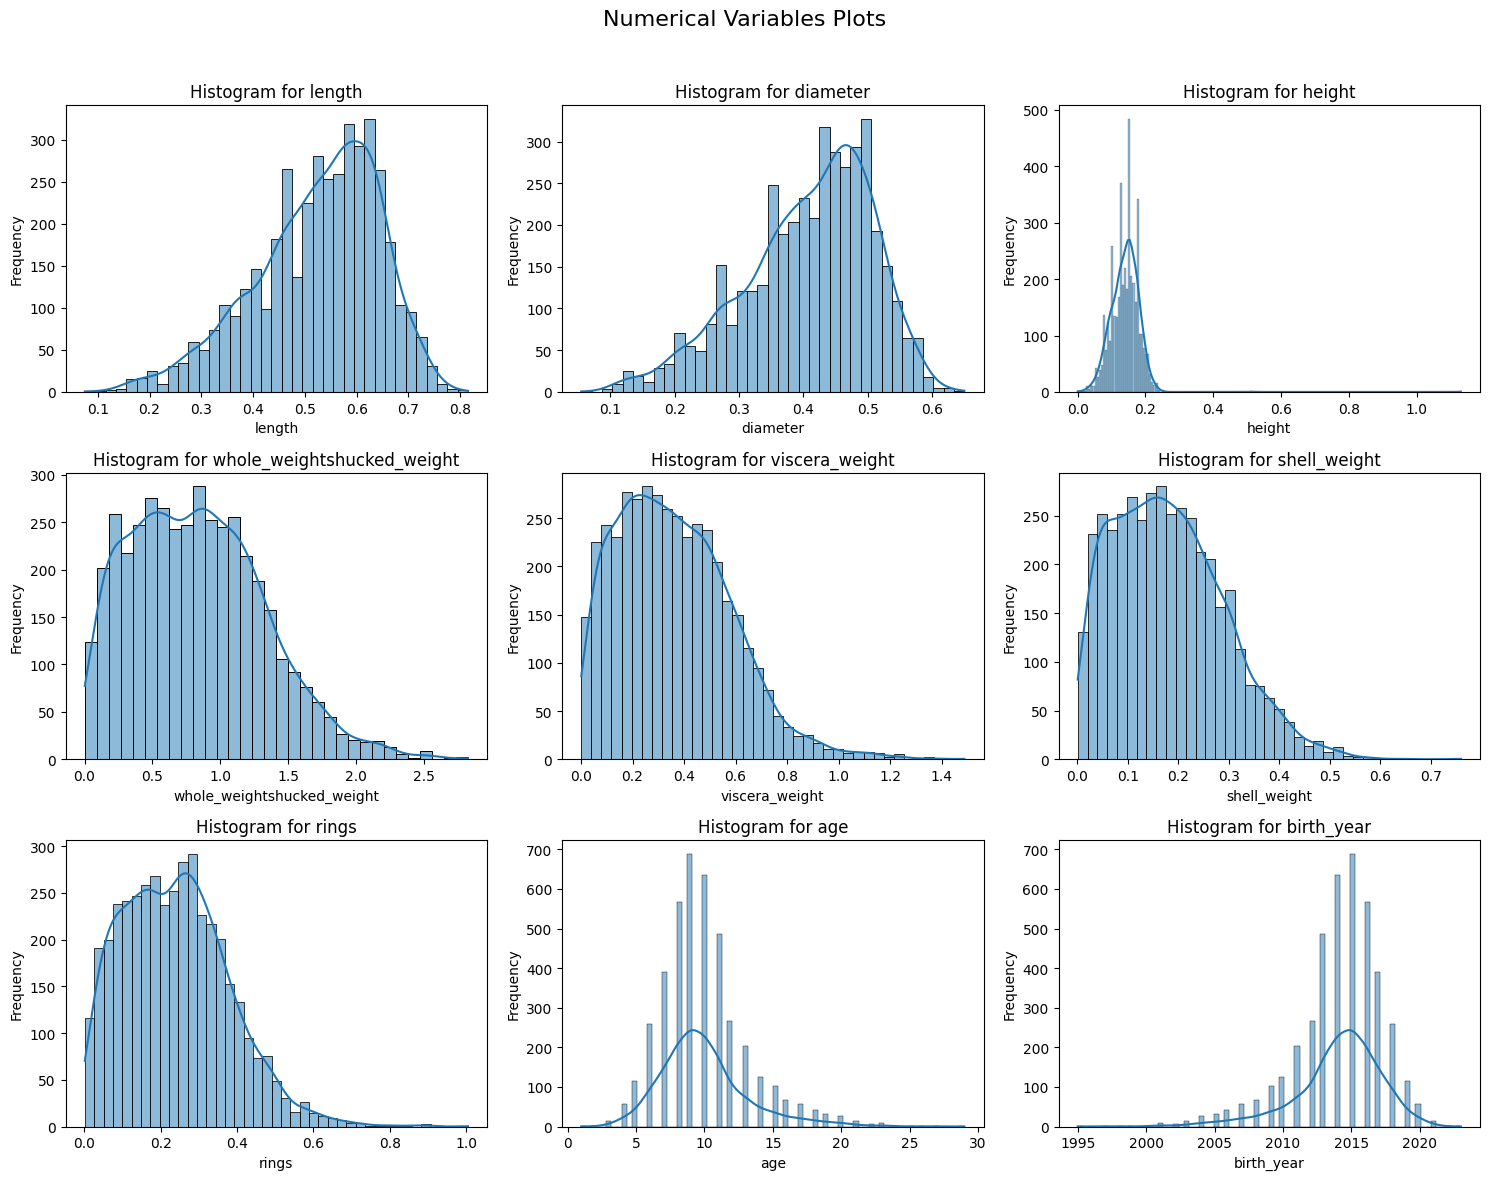

In [29]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), dpi=100)
fig.suptitle('Numerical Variables Plots', fontsize=16)
axes = axes.flatten()

# Loop through each numerical column and create plots
for i, num_col in enumerate(num_cols):
    # Plot a histogram
    sns.histplot(df[num_col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram for {num_col}')
    axes[i].set_xlabel(num_col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

#### finding the skeness of data


In [30]:
## finding the skewness of the data
skew_values = skew(df[num_cols], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(num_cols), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,height,3.127694
7,age,1.113702
4,viscera_weight,0.718840
6,rings,0.620704
5,shell_weight,0.591640
3,whole_weightshucked_weight,0.530768
1,diameter,-0.608979
0,length,-0.639643
8,birth_year,-1.113702


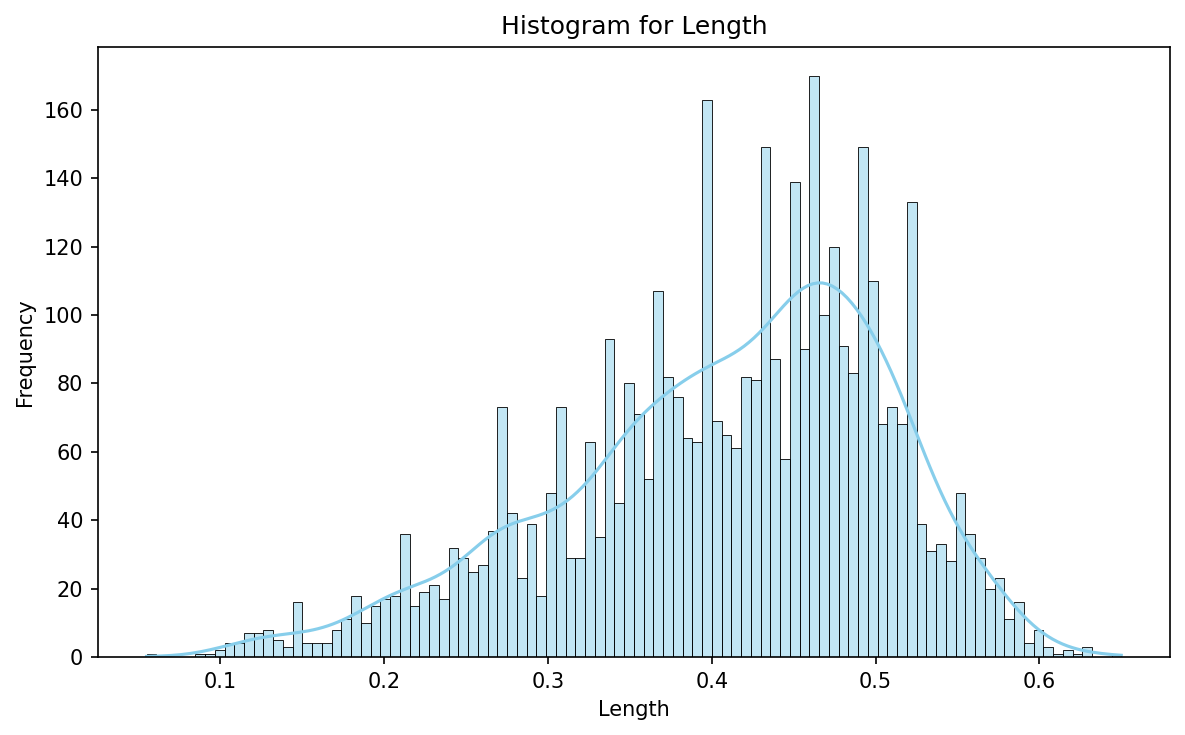

In [31]:
fig = plt.figure(figsize=(8, 5 ), dpi=150)
# Plot the variable
ax = sns.histplot(df["diameter"],  kde=True, color='skyblue', bins=100)
ax.set_title(f'Histogram for Length')
ax.set_xlabel("Length")
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

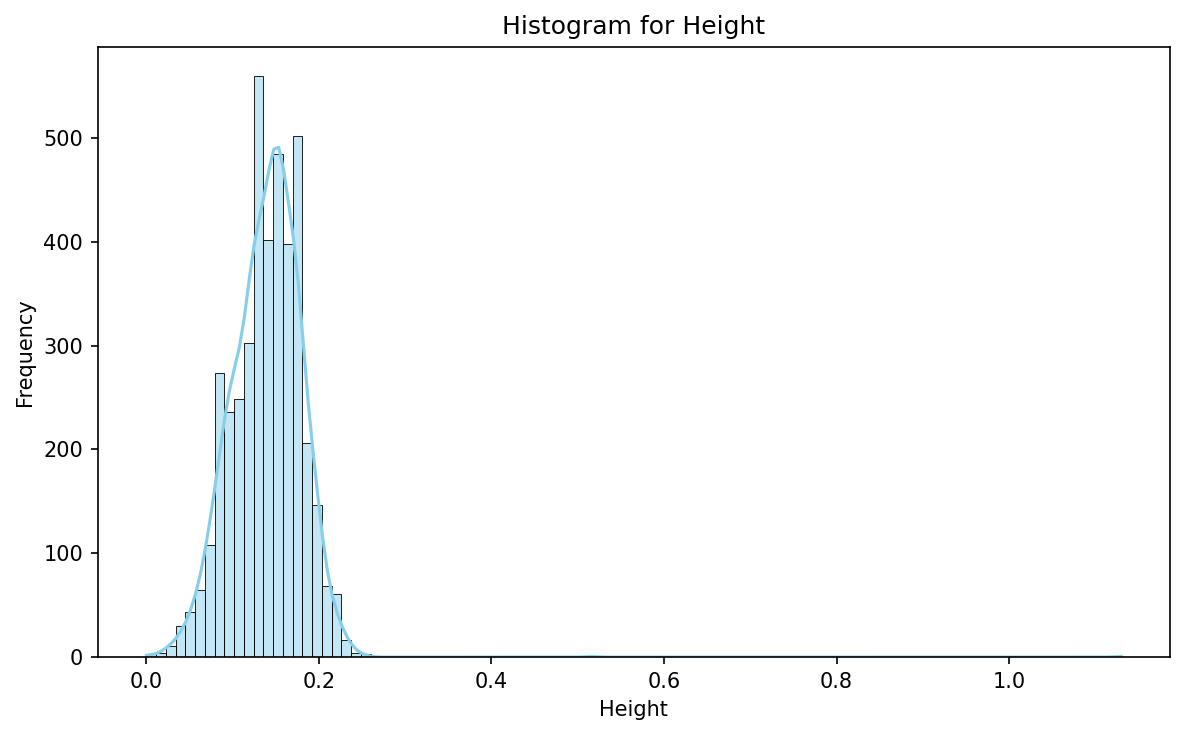

In [32]:
fig = plt.figure(figsize=(8, 5 ), dpi=150)
# Plot the variable
ax = sns.histplot(df["height"],  kde=True, color='skyblue', bins=100)
ax.set_title(f'Histogram for Height')
ax.set_xlabel("Height")
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

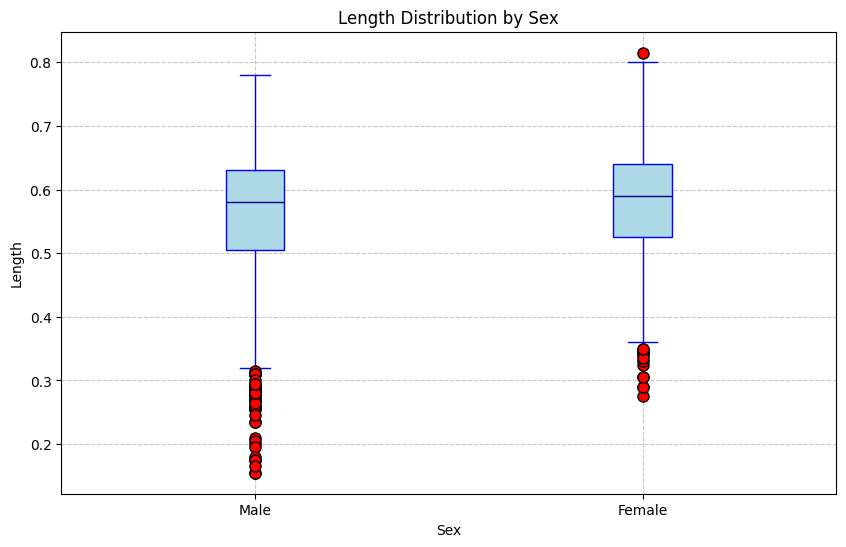

In [33]:
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_by_sex[filtered_by_sex['sex'] == 'M']['length'], 
             filtered_by_sex[filtered_by_sex['sex'] == 'F']['length'],],
            labels=['Male', 'Female'],
            patch_artist=True,  # Fill with color
            boxprops=dict(facecolor='lightblue', color='blue'),  # Box color
            whiskerprops=dict(color='blue'),  # Whisker color
            capprops=dict(color='blue'),  # Cap color
            medianprops=dict(color='darkblue'),  # Median line color
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))  # Outlier color

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Length')
plt.title('Length Distribution by Sex')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [34]:
## finding an outliers
threshold = 3
mean = np.mean(df["length"])
sd = np.std(df["length"])
outliers = []
print(df["length"] == "male")
for i in df["length"]:
    print(i)
    z_score = (i-mean)/sd
    if np.abs(z_score) > threshold:
        outliers.append(i)
print(len(outliers))

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Name: length, Length: 4177, dtype: bool
0.455
0.35
0.53
0.44
0.33
0.425
0.53
0.545
0.475
0.55
0.525
0.43
0.49
0.535
0.47
0.5
0.355
0.44
0.365
0.45
0.355
0.38
0.565
0.55
0.615
0.56
0.58
0.59
0.605
0.575
0.58
0.68
0.665
0.68
0.705
0.465
0.54
0.45
0.575
0.355
0.45
0.55
0.24
0.205
0.21
0.39
0.47
0.46
0.325
0.525
0.52
0.4
0.485
0.47
0.405
0.5
0.445
0.47
0.245
0.505
0.45
0.505
0.53
0.425
0.52
0.475
0.565
0.595
0.475
0.31
0.555
0.4
0.595
0.57
0.605
0.6
0.595
0.6
0.555
0.615
0.575
0.62
0.52
0.595
0.58
0.57
0.625
0.56
0.46
0.575
0.565
0.555
0.595
0.625
0.695
0.665
0.535
0.47
0.47
0.475
0.36
0.55
0.53
0.53
0.605
0.52
0.545
0.5
0.51
0.435
0.495
0.465
0.435
0.425
0.545
0.53
0.49
0.44
0.56
0.405
0.47
0.385
0.515
0.37
0.36
0.27
0.375
0.385
0.7
0.71
0.595
0.44
0.325
0.35
0.265
0.425
0.305
0.345
0.405
0.375
0.565
0.55
0.65
0.56
0.475
0.49
0.46
0.28
0

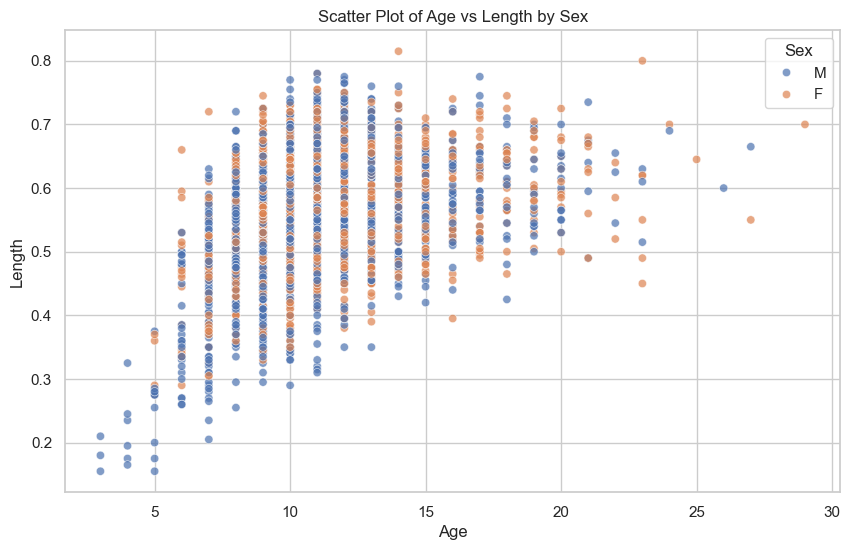

In [35]:
## plotting a seaborn scatter plot
sns.set(style="whitegrid")
## setting graph size
plt.figure(figsize=(10, 6))
## implementing seaborn scatter plot
sns.scatterplot(data=filtered_by_sex, x="age", y="length", hue="sex", alpha=0.7)
## tile of graphs
plt.title("Scatter Plot of Age vs Length by Sex")
##labels of the braphs
plt.xlabel("Age")
plt.ylabel("Length")
plt.legend(title="Sex")
plt.show()

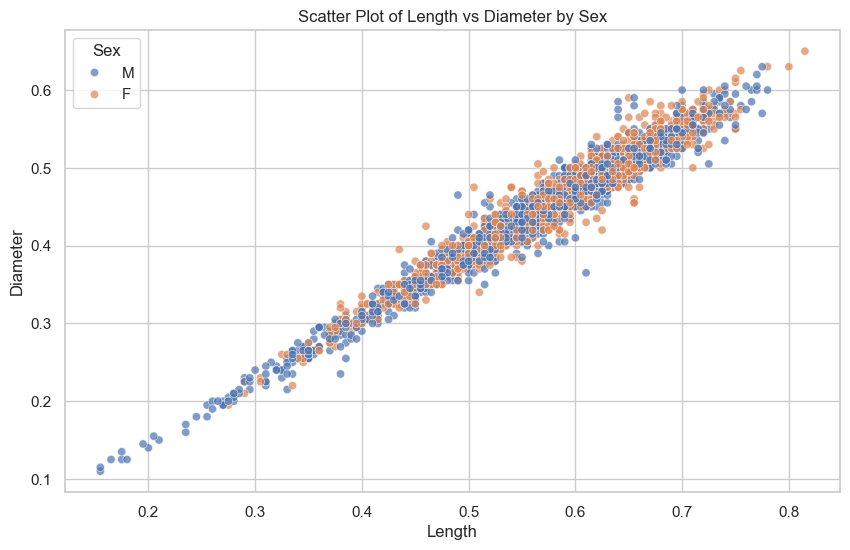

In [36]:
## plotting a seaborn scatter plot
sns.set(style="whitegrid")
## setting graph size
plt.figure(figsize=(10, 6))
## implementing seaborn scatter plot
sns.scatterplot(data=filtered_by_sex, x="length", y="diameter", hue="sex", alpha=0.7)
## tile of graphs
plt.title("Scatter Plot of Length vs Diameter by Sex")
##labels of the braphs
plt.xlabel("Length")
plt.ylabel("Diameter")
plt.legend(title="Sex")
plt.show()

## findings of EDA

1. The majority of abalones in the dataset are of the male sex.
2. The length and diameter of abalones are highly correlated, indicating that they have a strong linear relationship.
3. The age of abalones increases with their length, diameter, and height, suggesting that these physical measurements can be used to predict the age of abalones.
4. The weight of abalones is also strongly correlated with their length, diameter, and height, indicating that weight can also be used as a predictor of abalone age.
5. The distribution of abalone age varies across different sex categories, with females generally having a higher age than males and infants.
6. There is a positive correlation between the number of rings and abalone age, indicating that the ring count method is a reliable way to determine the age of abalones.
7. The correlation matrix heatmap shows that there are strong positive correlations between the physical measurements of abalones (length, diameter, height, and weight), but only weak correlations between these measurements and the number of rings. This suggests that predicting the age of abalones from their physical measurements may require additional information, such as weather patterns and location (hence food availability).

In [37]:
alpha_ = 0.05

## hypothesis test

In [38]:
# Let's say we are testing if the mean length of male abalones is different from female abalones
male_length = df[df['sex'] == 'M']['length']
female_length = df[df['sex'] == 'F']['length']

# Null hypothesis: The means are equal
# Alternative hypothesis: The means are not equal
t_stat, p_val = stats.ttest_ind(male_length, female_length)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


T-statistic: -4.923512005809771
P-value: 8.987874966212852e-07


##### The t-statistic that was produced, which shows the difference in standard error units between the means of the two groups, is -4.923512005809771. Male abalones appear to have a shorter mean length than female abalones, according to a negative t-statistic.

##### The t-test's p-value is 8.987874966212852e-07, which is extremely tiny. Assuming the null hypothesis is correct, this suggests that the observed variation in mean lengths between male and female abalones is very unlikely to have happened by chance alone.

## z_test

#### since our sample has data that is more than 30 so, in this case Z-test is more appropriate

In [39]:
# Z-Test
z_stat, p_val = sm.stats.ztest(male_length, female_length)

print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_val}')


Z-statistic: -4.923512005809771
P-value: 8.500465908456228e-07


##### The Z-statistic in this case is around -4.92, meaning that the observed variation from the mean between the average of the male and female abalone lengths is 4.92 standard deviations.
##### The p-value in this case is 0.00000085. The p-value is incredibly tiny, indicating strong evidence against the null hypothesis.

the negative sign on Z-stats shows us that the mean of male length is smaller than the mean of the female group which we can see above. And also our pvalue is smaller and it is 0.00000085 which is way smaller, provides strong evidence to reject the null hypothesis. 


### two way anova test

In [40]:
# Let's say we are testing if the mean length differs by sex
## creating a model variable for annova tests
model = ols('length ~ C(sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


             sum_sq      df           F  PR(>F)
C(sex)    18.536780     2.0  927.933298     0.0
Residual  41.690777  4174.0         NaN     NaN


### person correlation coffecient

In [41]:
## finding thepearson correlation coefficient
corr, p_val = stats.pearsonr(df['length'], df['diameter'])
print(f'Correlation coefficient: {corr}')
print(f'P-value: {p_val}')

Correlation coefficient: 0.9868115846024801
P-value: 0.0


##### The "length" and "diameter" variables have a correlation value of around 0.987. A significant linear relationship between the length and diameter of the items being measured is suggested by this high positive correlation.

### spearmans rank correlation

In [42]:
## finding thepearson correlation coefficient
corr, p_val = stats.spearmanr(df['length'], df['diameter'])
print(f'Correlation coefficient: {corr}')
print(f'P-value: {p_val}')

Correlation coefficient: 0.9833190319559632
P-value: 0.0


##### The correlation coefficient in this instance between "length" and "diameter" is around 0.9833. A coefficient around 1 denotes a strong positive monotonic connection, meaning that the diameter tends to rise in proportion to the abalone's length and vice versa.

### mann whiteny 

In [43]:
## finding the mann whiteny:
u_stat, p_val = stats.mannwhitneyu(male_length, female_length)
print(f'U-statistic: {u_stat}')
print(f'P-value: {p_val}')


U-statistic: 915028.0
P-value: 0.00012052565838273145


##### The U-statistic in this case is 915028.0 which measures how closely the two samples are related to one another

#### kendalls tau

In [44]:
### finding the kendalls tau:
tau, p_val = stats.kendalltau(df['length'], df['diameter'])

print(f'Tau: {tau}')
print(f'P-value: {p_val}')


Tau: 0.9081221846039155
P-value: 0.0


#####  the data provided indicates a strong positive association between the 'length' and 'diameter' variables, as indicated by Kendall's tau coefficient (τ) of approximately 0.908.

In [45]:
# mean male length
male_length = df[df['sex'] == 'M']['length'].mean()

In [46]:

# absolute error
male_absolute_errors = np.abs(df[df['sex'] == 'M']['length']- male_length)

In [47]:
# mean absolute error
mean_abs_error = male_absolute_errors.mean()

In [48]:
# squared errors
squared_errors = (df[df['sex'] == 'M']['length'] - male_length)**2

In [49]:

# mean squared error
m_s_e = squared_errors.mean()

In [50]:

# root mean squared error
r_m_s_e = np.sqrt(m_s_e)


In [51]:

# total sum of squares (TSS)
total_sum_sq = ((df[df['sex'] == 'M']['length'] - male_length)**2).sum()

In [52]:

# residual sum of squares (RSS)
residual_sum_sq = squared_errors.sum()

In [53]:

# coefficient of determination (R-squared)
rSquared = 1 - (residual_sum_sq / total_sum_sq)

In [54]:
# lets assume p = 4
p = 4
# number of observations (n)
n = len(df)


In [55]:
# adjusted R-squared
adjusted_r_squared = 1 - ((residual_sum_sq / (n - p - 1)) / (total_sum_sq / (n - 1)))

print("Mean Absolute Error:", mean_abs_error)
print("Mean Squared Error:", m_s_e)
print("Root Mean Squared Error:", r_m_s_e)
print("R-squared:", rSquared)
print("Adjusted R-squared:", adjusted_r_squared)


Mean Absolute Error: 0.07909293964666538
Mean Squared Error: 0.010539836222537074
Root Mean Squared Error: 0.10266370450425542
R-squared: 0.0
Adjusted R-squared: -0.0009587727708533222


#### Regression 

In [56]:

# Defining our features and target
## X_ are features/predictors/independent variables
X_length = df[['length']]
X_diameter = df[['diameter']]
X_viscera_weight = df[['viscera_weight']]
## target variable is rings
y = df['rings']  


In [57]:
## finding the coralation between dependent and independent variables
subset_df = df.loc[:, ['length', 'diameter', 'viscera_weight', 'rings']]
subset_df.corr()

,length,diameter,viscera_weight,rings
length,1.000000,0.986812,0.897914,0.897706
diameter,0.986812,1.000000,0.893162,0.905330
viscera_weight,0.897914,0.893162,1.000000,0.882617
rings,0.897706,0.905330,0.882617,1.000000


In [58]:
# Split df into training and testing sets
X_train_length, X_test_length, y_train, y_test = train_test_split(X_length, y, test_size=0.2, random_state=42)

In [59]:
# Initialize and fit linear regression models for length
lr_length = LinearRegression()
lr_length.fit(X_train_length, y_train)

LinearRegression()

In [60]:
# Predictions for the length
y_pred_length = lr_length.predict(X_test_length)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


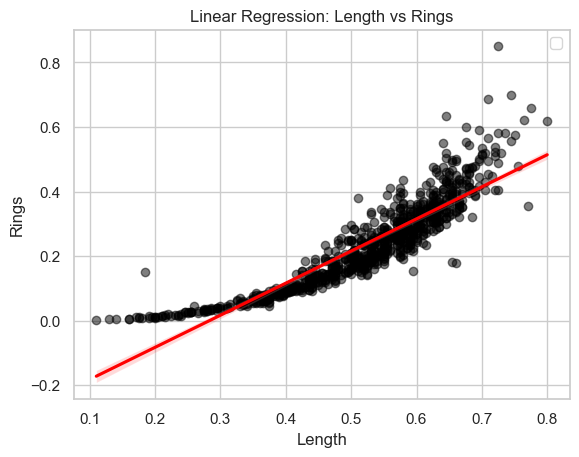

In [61]:
# Plotting the linear regression model with Length as the independent variable
sns.regplot(x=X_test_length, y=y_test,scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title('Linear Regression: Length vs Rings')
plt.legend()
plt.show()

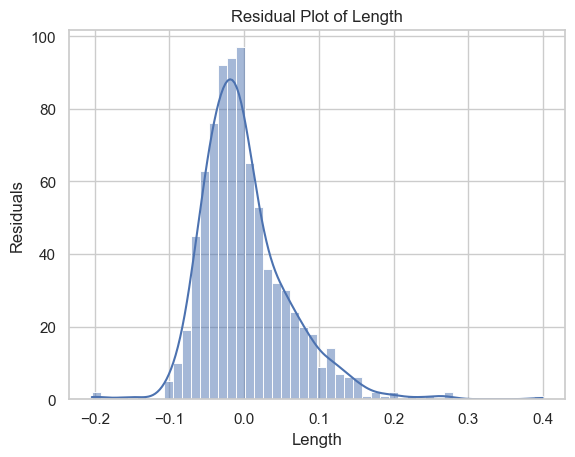

In [62]:
# Plotting the residuals for the linear regression model with Length as the independent variable
residuals_length = y_test - y_pred_length
sns.histplot(residuals_length, bins = 50, kde=True)
plt.xlabel('Length')
plt.ylabel('Residuals')
plt.title('Residual Plot of Length')
plt.show()

In [63]:
# Evaluation metrics for the linear regression model
mae_length = mean_absolute_error(y_test, y_pred_length)

mse_length = mean_squared_error(y_test, y_pred_length)

r2_length = r2_score(y_test, y_pred_length)

In [64]:
print("MAE (Length):", mae_length)
print("MSE (Length):", mse_length)
print("R-squared (Length):", r2_length)

MAE (Length): 0.04298473606399985
MSE (Length): 0.003424265238579531
R-squared (Length): 0.8153012111236607


### for diamater


In [65]:

# Split df into training and testing sets
X_train_diameter, X_test_diameter = train_test_split(X_diameter, test_size=0.2, random_state=42)


In [66]:
# Initialize and fit linear regression models
lr_diameter = LinearRegression()
lr_diameter.fit(X_train_diameter, y_train)

LinearRegression()

In [67]:
# Predictions
y_pred_diameter = lr_diameter.predict(X_test_diameter)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


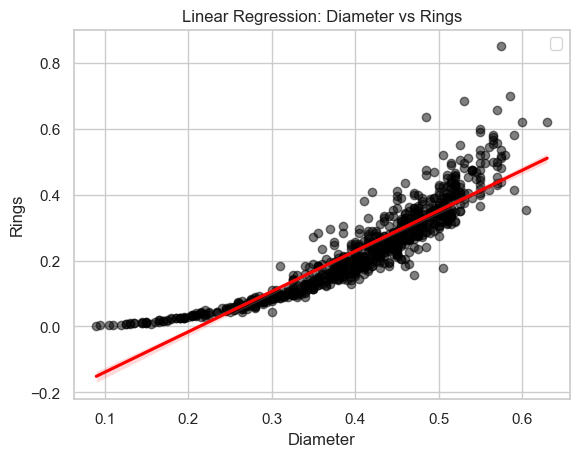

In [68]:
# Plotting the linear regression model with Length as the independent variable
sns.regplot(x=X_test_diameter, y=y_test,scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.title('Linear Regression: Diameter vs Rings')
plt.legend()
plt.show()

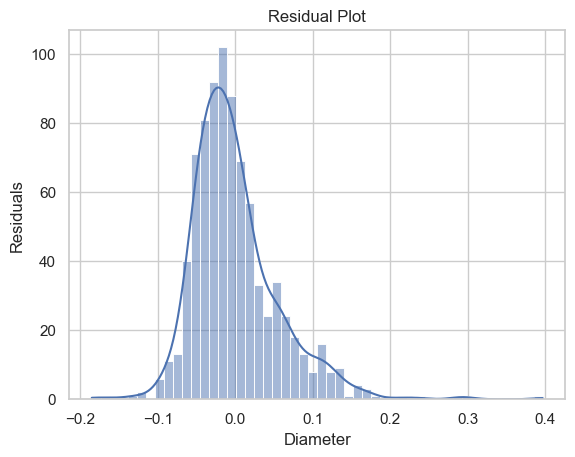

In [69]:
# Plotting the residuals for the linear regression model with Length as the independent variable
residuals_length = y_test - y_pred_diameter
sns.histplot(residuals_length, bins = 50, kde=True)
plt.xlabel('Diameter')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [70]:
# Evaluation metrics for the linear regression model
mae_length = mean_absolute_error(y_test, y_pred_diameter)

mse_length = mean_squared_error(y_test, y_pred_diameter)

r2_length = r2_score(y_test, y_pred_diameter)

In [71]:
print("MAE (Length):", mae_length)
print("MSE (Length):", mse_length)
print("R-squared (Length):", r2_length)

MAE (Length): 0.04088160947941207
MSE (Length): 0.0031234256492910085
R-squared (Length): 0.8315279645776937


### for viscera  

In [72]:
X_train_viscera_weight, X_test_viscera_weight = train_test_split(X_viscera_weight, test_size=0.2, random_state=42)


In [73]:
lr_viscera_weight = LinearRegression()
lr_viscera_weight.fit(X_train_viscera_weight, y_train)

LinearRegression()

In [74]:
y_pred_viscera_weight = lr_viscera_weight.predict(X_test_viscera_weight)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


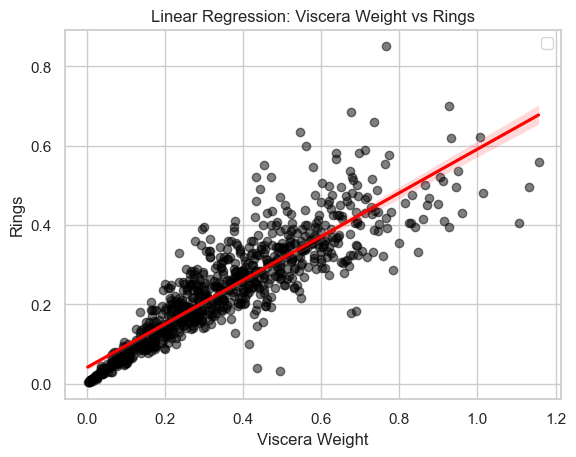

In [75]:
# Plotting the linear regression model with Length as the independent variable
sns.regplot(x=X_test_viscera_weight, y=y_test,scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.xlabel('Viscera Weight')
plt.ylabel('Rings')
plt.title('Linear Regression: Viscera Weight vs Rings')
plt.legend()
plt.show()

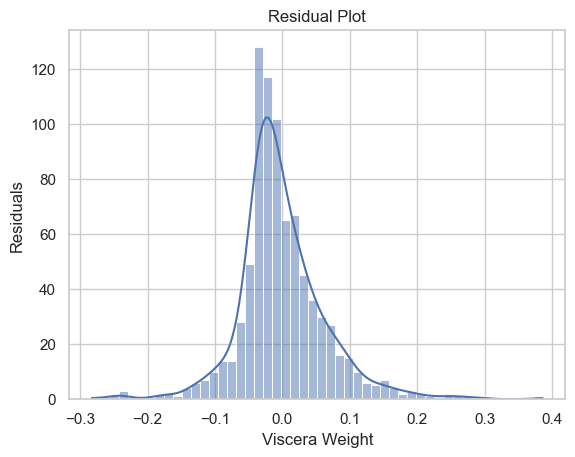

In [76]:
# Plotting the residuals for the linear regression model with Length as the independent variable
residuals_length = y_test - y_pred_viscera_weight
sns.histplot(residuals_length, bins = 50, kde=True)
plt.xlabel('Viscera Weight')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [77]:
# Evaluation metrics for the linear regression model
mae_length = mean_absolute_error(y_test, y_pred_viscera_weight)

mse_length = mean_squared_error(y_test, y_pred_viscera_weight)

r2_length = r2_score(y_test, y_pred_viscera_weight)

In [78]:
print("MAE (Viscera Weight):", mae_length)
print("MSE (Viscera Weight):", mse_length)
print("R-squared (Viscera Weight):", r2_length)

MAE (Viscera Weight): 0.04568359494416806
MSE (Viscera Weight): 0.004174629503131404
R-squared (Viscera Weight): 0.7748278945950886


### Multiple linear regression

R-squared: 0.5249720723479736
Adjusted R-squared: 0.5221104583259735


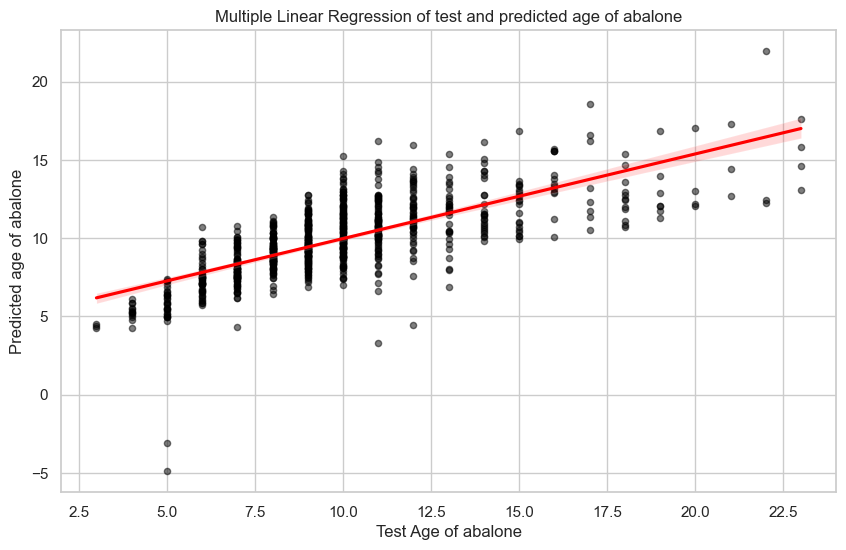

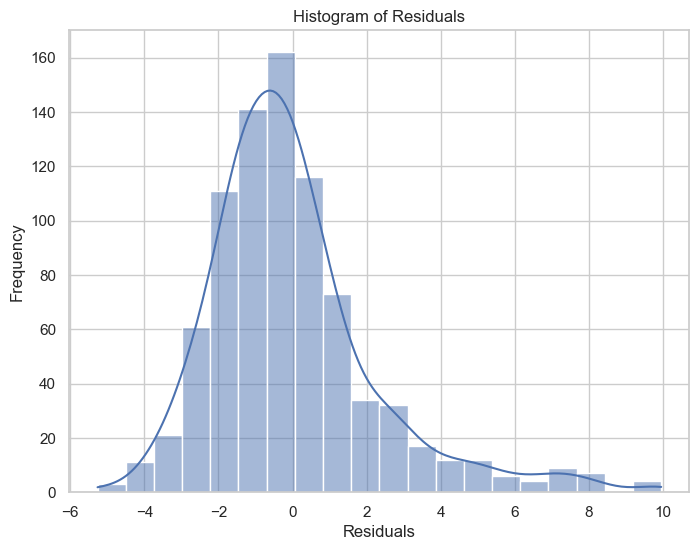

In [79]:


# Define features and target
X = df[['length', 'diameter', 'height', 'whole_weightshucked_weight', 'viscera_weight', 'shell_weight']]
y = df['age']  # 'age' is the target variable

# Split df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Predictions
y_pred = multiple_lr.predict(X_test)

# Evaluation

r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


n = len(y_test)

# Calculate the number of predictor variables 
p = X.shape[1] - 1

# Calculate the adjusted R-squared value
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)
# Plotting regression plot 
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred,scatter_kws = {"color": "black", "alpha": 0.5, "s": 20},
            line_kws = {"color": "red"})
plt.xlabel('Test Age of abalone')
plt.ylabel('Predicted age of abalone')
plt.title('Multiple Linear Regression of test and predicted age of abalone')
plt.show()





# Plotting residual histogram
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
